In [1]:
import pandas as pd

titanic_data = pd.read_csv("../data/tested.csv")

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [3]:
titanic_data.drop(["Name", "Cabin", "PassengerId", "Ticket"], axis=1, inplace=True)

titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

titanic_data["Sex"] = le.fit_transform(titanic_data["Sex"])

titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,Q
1,1,3,0,47.0,1,0,7.0000,S
2,0,2,1,62.0,0,0,9.6875,Q
3,0,3,1,27.0,0,0,8.6625,S
4,1,3,0,22.0,1,1,12.2875,S


In [5]:
le.classes_

array(['female', 'male'], dtype=object)

In [6]:
titanic_data = pd.get_dummies(titanic_data, columns=["Embarked"])
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,34.5,0,0,7.8292,0,1,0
1,1,3,0,47.0,1,0,7.0000,0,0,1
2,0,2,1,62.0,0,0,9.6875,0,1,0
3,0,3,1,27.0,0,0,8.6625,0,0,1
4,1,3,0,22.0,1,1,12.2875,0,0,1


In [7]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_data = missing_values_table(titanic_data)

missing_data

Your selected dataframe has 10 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Age,86,20.6
Fare,1,0.2


In [9]:
titanic_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188,0.244019,0.110048,0.645933
std,0.481622,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576,0.430019,0.313324,0.478803
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


In [10]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

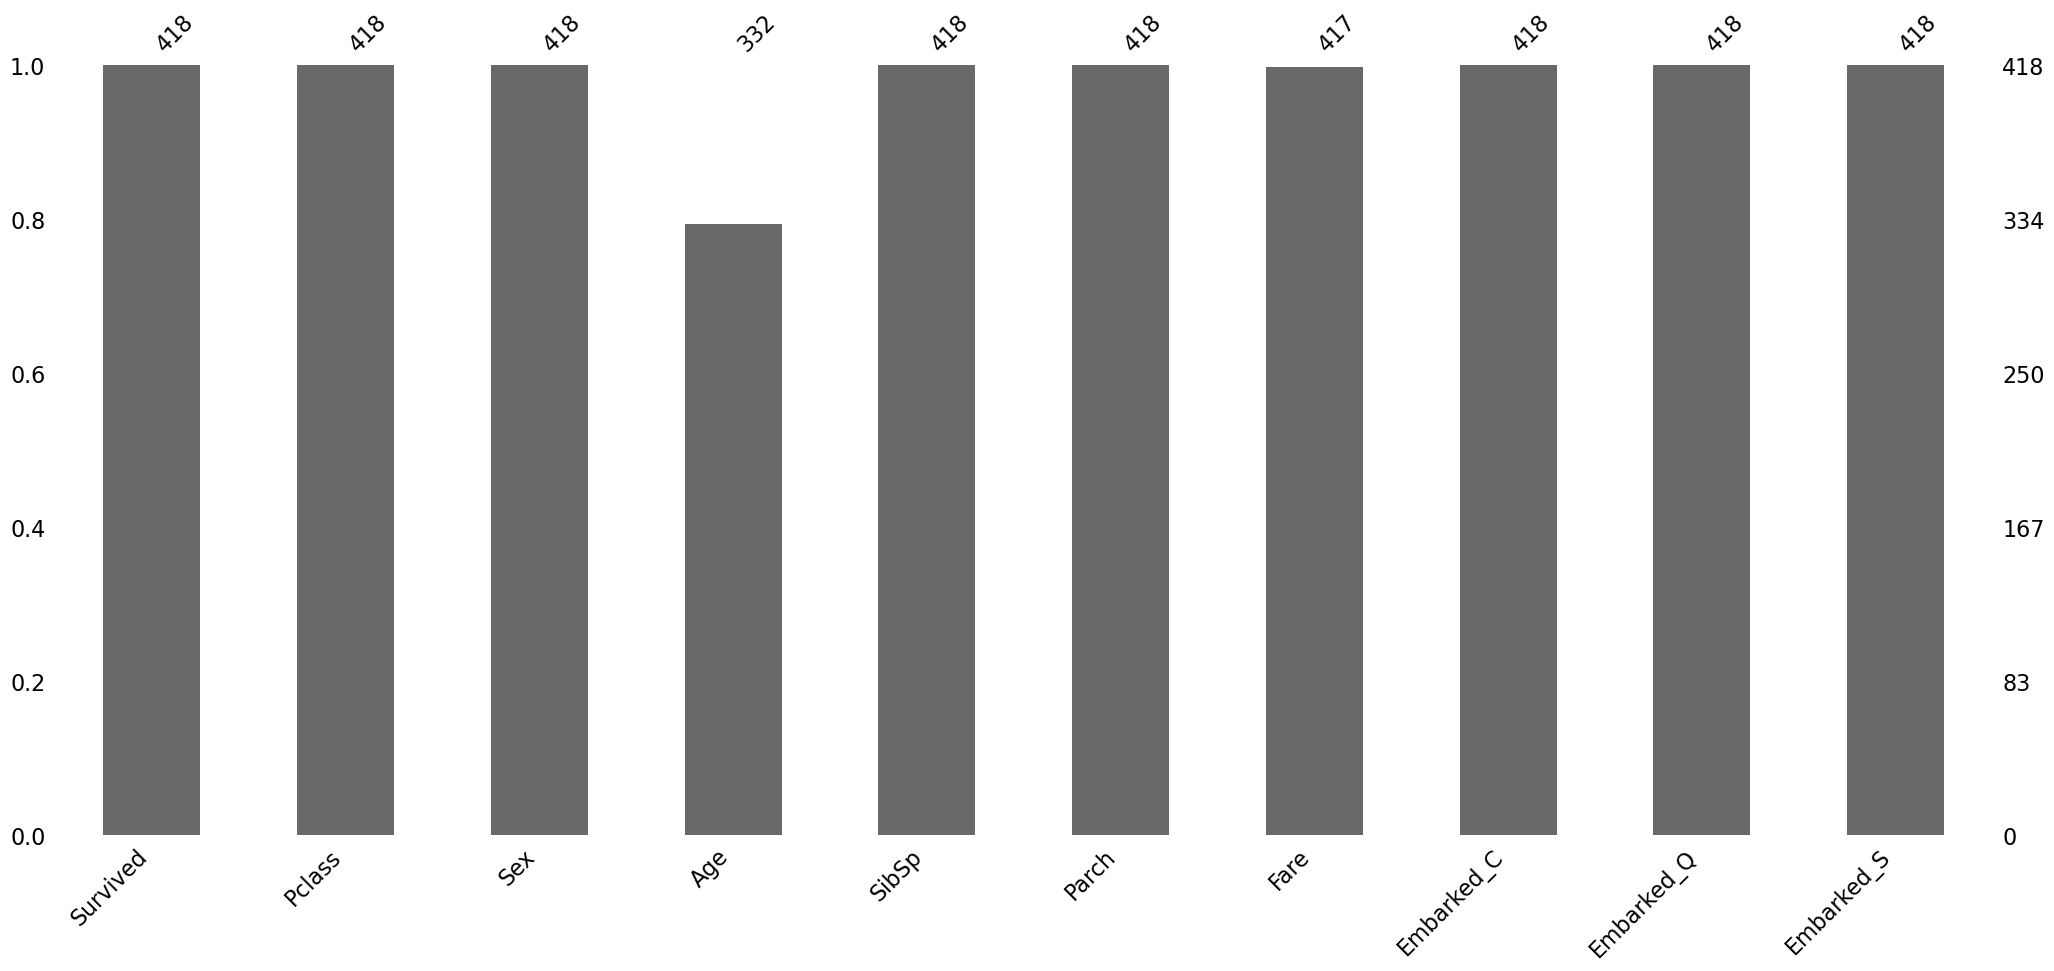

In [11]:
import missingno as msno

msno.bar(titanic_data)

<Axes: >

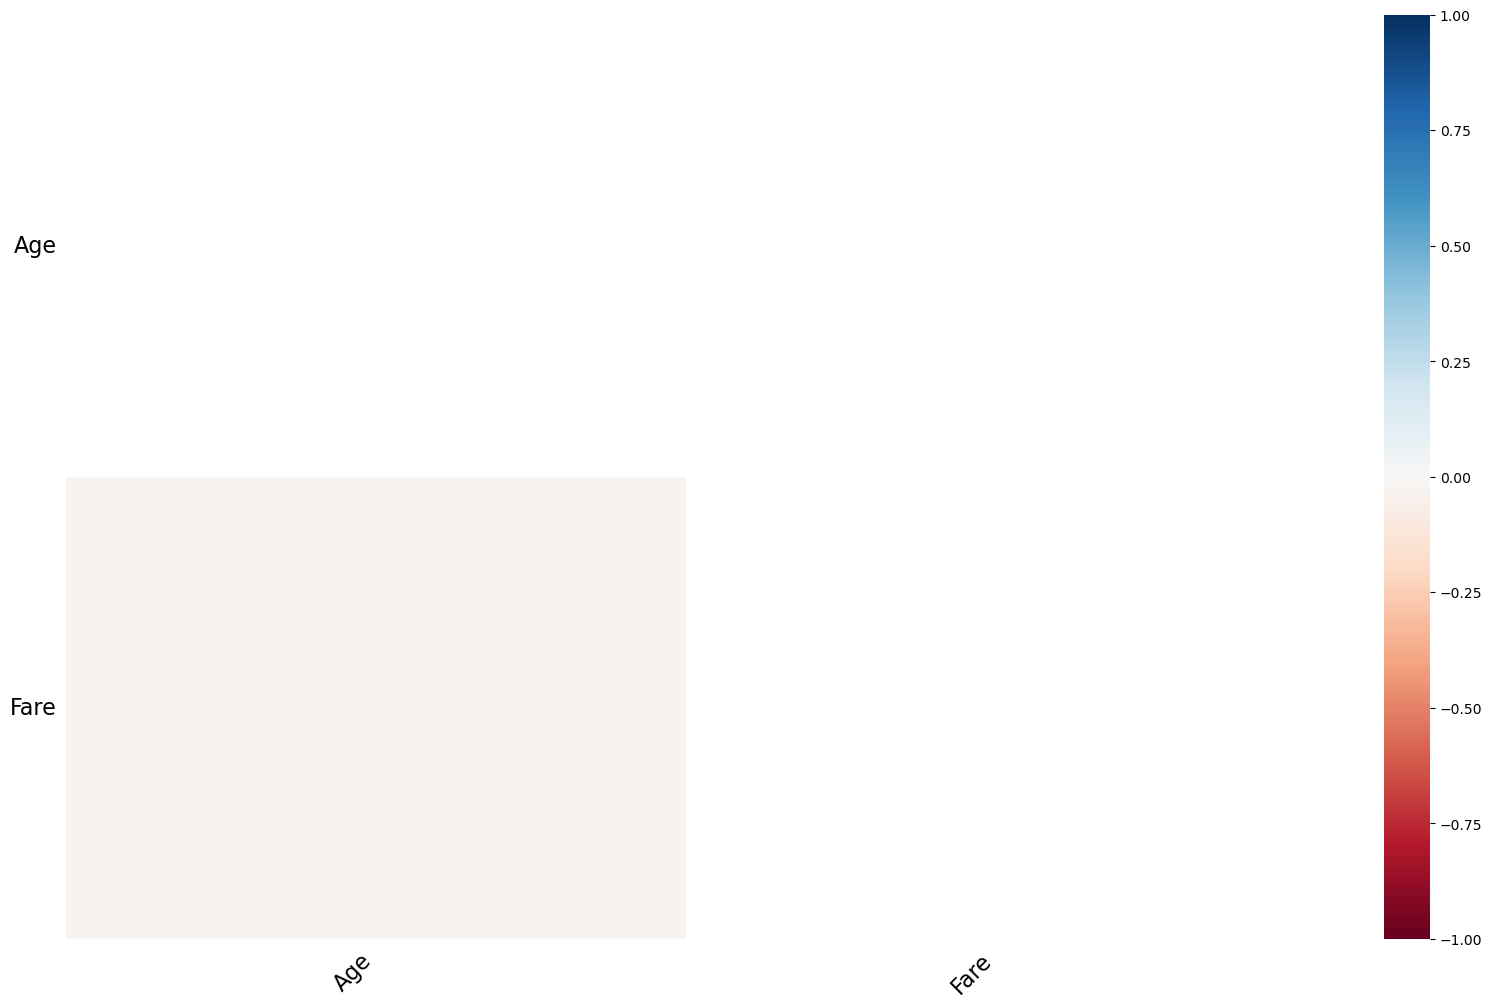

In [12]:
msno.heatmap(titanic_data)

In [15]:
from sklearn.impute import SimpleImputer

sm = SimpleImputer(strategy="mean")

titanic_data.iloc[:,:] = sm.fit_transform(titanic_data)

titanic_data.head()

C:\Users\Bosei\AppData\Local\Temp\ipykernel_12396\4131264166.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  titanic_data.iloc[:,:] = sm.fit_transform(titanic_data)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,1.0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0
1,1.0,3.0,0.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0
2,0.0,2.0,1.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0
3,0.0,3.0,1.0,27.0,0.0,0.0,8.6625,0.0,0.0,1.0
4,1.0,3.0,0.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0


In [16]:
missing_data = missing_values_table(titanic_data)

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.


In [18]:
titanic_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188,0.244019,0.110048,0.645933
std,0.481622,0.841838,0.481622,12.634534,0.896760,0.981429,55.840500,0.430019,0.313324,0.478803
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,30.272590,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


In [20]:
from sklearn.cluster import estimate_bandwidth, MeanShift

bw_estimate = estimate_bandwidth(titanic_data)

bw_estimate

30.03392469675911

In [21]:
model_cluster = MeanShift(bandwidth=bw_estimate)

model_cluster.fit(titanic_data)

MeanShift(bandwidth=30.03392469675911)

In [24]:
import numpy as np

labels = model_cluster.labels_

np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int64)

In [29]:
titanic_data["cluster"] = np.nan

for i in range(len(titanic_data)):
    titanic_data.iloc[i, titanic_data.columns.get_loc("cluster")] = labels[i]
    
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,cluster
0,0.0,3.0,1.0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0,0.0
1,1.0,3.0,0.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,0.0
2,0.0,2.0,1.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,0.0
3,0.0,3.0,1.0,27.0,0.0,0.0,8.6625,0.0,0.0,1.0,0.0
4,1.0,3.0,0.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0.0


In [30]:
titanic_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,cluster
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188,0.244019,0.110048,0.645933,0.181818
std,0.481622,0.841838,0.481622,12.634534,0.896760,0.981429,55.840500,0.430019,0.313324,0.478803,0.579799
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,30.272590,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,0.000000,0.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,4.000000


In [31]:
titanic_data_cluster = titanic_data.groupby(["cluster"]).mean()

titanic_data_cluster

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
cluster,,,,,,,,,,
0.0,0.337838,2.42973,0.662162,28.682278,0.421622,0.356757,19.305051,0.194595,0.121622,0.683784
1.0,0.500000,1.00000,0.500000,41.766667,0.566667,0.466667,106.712363,0.600000,0.033333,0.366667
2.0,0.555556,1.00000,0.444444,45.833333,0.555556,0.222222,216.688900,0.555556,0.000000,0.444444
3.0,0.750000,1.00000,0.250000,39.750000,1.125000,1.875000,260.674475,0.750000,0.000000,0.250000
4.0,1.000000,1.00000,0.000000,58.000000,0.000000,1.000000,512.329200,1.000000,0.000000,0.000000


In [32]:
titanic_data_cluster["Count"] = pd.Series(titanic_data.groupby(["cluster"]).size())
titanic_data_cluster

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Count
cluster,,,,,,,,,,,
0.0,0.337838,2.42973,0.662162,28.682278,0.421622,0.356757,19.305051,0.194595,0.121622,0.683784,370
1.0,0.500000,1.00000,0.500000,41.766667,0.566667,0.466667,106.712363,0.600000,0.033333,0.366667,30
2.0,0.555556,1.00000,0.444444,45.833333,0.555556,0.222222,216.688900,0.555556,0.000000,0.444444,9
3.0,0.750000,1.00000,0.250000,39.750000,1.125000,1.875000,260.674475,0.750000,0.000000,0.250000,8
4.0,1.000000,1.00000,0.000000,58.000000,0.000000,1.000000,512.329200,1.000000,0.000000,0.000000,1


In [34]:
titanic_data[ titanic_data["cluster"] == 1].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,cluster
12,1.0,1.0,0.0,23.0,1.0,0.0,82.2667,0.0,0.0,1.0,1.0
48,1.0,1.0,0.0,60.0,0.0,0.0,76.2917,1.0,0.0,0.0,1.0
96,1.0,1.0,0.0,76.0,1.0,0.0,78.8500,0.0,0.0,1.0,1.0
118,0.0,1.0,1.0,36.0,0.0,0.0,75.2417,1.0,0.0,0.0,1.0
141,1.0,1.0,0.0,33.0,0.0,0.0,151.5500,0.0,0.0,1.0,1.0
